In [1]:
import pandas as pd
from player import Player
from ratingscraper import *
from scorescraper import *
from estimation import *
from simulations import *

## Generate players

In [7]:
df = pd.read_csv('wcplayers.csv')

In [8]:
df

,﻿Player,FideId
0,Peter Svidler,4102142
1,Maxime Vachier-Lagrave,623539
2,Vassily Ivanchuk,14100010
3,Levon Aronian,13300474
4,Wesley So,5202213
5,Vladimir Fedoseev,24130737
6,Richard Rapport,738590
7,Ding Liren,8603677


In [12]:
players = []
for x in df.iterrows():
    row = x[1]
    players.append(Player(name=row[0], fide_id=row[1]))

## Web scraping

In [13]:
scrape_ratings(players)

In [14]:
players

[Peter Svidler (2756),
 Maxime Vachier-Lagrave (2804),
 Vassily Ivanchuk (2727),
 Levon Aronian (2802),
 Wesley So (2792),
 Vladimir Fedoseev (2731),
 Richard Rapport (2675),
 Ding Liren (2771)]

In [15]:
playerdict = {player.name: player for player in players}

In [16]:
scrape_scores(players)

Fetching head-to-head score between Peter Svidler and Peter Svidler
Fetching head-to-head score between Peter Svidler and Maxime Vachier-Lagrave
Fetching head-to-head score between Peter Svidler and Vassily Ivanchuk
Fetching head-to-head score between Peter Svidler and Levon Aronian
Fetching head-to-head score between Peter Svidler and Wesley So
Fetching head-to-head score between Peter Svidler and Vladimir Fedoseev
Fetching head-to-head score between Peter Svidler and Richard Rapport
Fetching head-to-head score between Peter Svidler and Ding Liren
Fetching head-to-head score between Maxime Vachier-Lagrave and Peter Svidler
Fetching head-to-head score between Maxime Vachier-Lagrave and Maxime Vachier-Lagrave
Fetching head-to-head score between Maxime Vachier-Lagrave and Vassily Ivanchuk
Fetching head-to-head score between Maxime Vachier-Lagrave and Levon Aronian
Fetching head-to-head score between Maxime Vachier-Lagrave and Wesley So
Fetching head-to-head score between Maxime Vachier-L

The scrape_scores() function takes a while to run, because it has to send a request to chessgames.com's slow search. The time complexity is O(n^2), which means it will become significantly faster as the World Cup progresses.

## Simulations

We simulate one World Cup and print out the results by setting the verbosity flag to 1.

In [17]:
W = 10
verbosity = 1
simulate_worldcup(players, 4, W, verbosity)

----------
Round 4
----------
Match Peter Svidler (2756) vs. Maxime Vachier-Lagrave (2804)
Game 1: Classical
Maxime Vachier-Lagrave won
Game 2: Classical
Peter Svidler won
Game 3: Rapid
Draw
Game 4: Rapid
Maxime Vachier-Lagrave won
Maxime Vachier-Lagrave (2804) won the match
Match Vassily Ivanchuk (2727) vs. Levon Aronian (2802)
Game 1: Classical
Draw
Game 2: Classical
Draw
Game 3: Rapid
Levon Aronian won
Game 4: Rapid
Vassily Ivanchuk won
Game 5: Rapid
Levon Aronian won
Game 6: Rapid
Draw
Levon Aronian (2802) won the match
Match Wesley So (2792) vs. Vladimir Fedoseev (2731)
Game 1: Classical
Wesley So won
Game 2: Classical
Vladimir Fedoseev won
Game 3: Rapid
Wesley So won
Game 4: Rapid
Wesley So won
Wesley So (2792) won the match
Match Richard Rapport (2675) vs. Ding Liren (2771)
Game 1: Classical
Ding Liren won
Game 2: Classical
Ding Liren won
Ding Liren (2771) won the match
----------
Round 5
----------
Match Maxime Vachier-Lagrave (2804) vs. Levon Aronian (2802)
Game 1: Classical
D

Levon Aronian (2802)

Now we run 10,000 simulations instead (without printing!) and display the results.

In [22]:
N = 10000
W = 10
verbosity = 0
simulated_players = worldcup_simulations(players, 3, N, W, verbosity)
for player in simulated_players:
    print(player, round(player.win_percentage*100, 3), "%")

Maxime Vachier-Lagrave (2804) 26.5 %
Wesley So (2792) 25.82 %
Levon Aronian (2802) 15.6 %
Ding Liren (2771) 10.34 %
Vassily Ivanchuk (2727) 9.57 %
Peter Svidler (2756) 5.9 %
Vladimir Fedoseev (2731) 4.42 %
Richard Rapport (2675) 1.85 %


## Plotting

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
def plot_winner_predictions(players):
    names = [player.name.split(" ")[-1] for player in players]
    win_percentages = [player.win_percentage for player in players]
    player_df = pd.DataFrame({"Name": names, "Win percentage": win_percentages})

    matplotlib.rcParams['figure.figsize'] = (16, 10)
    matplotlib.rcParams['font.size'] = 40
    sns.barplot(x="Name", y="Win percentage", data=player_df[player_df["Win percentage"]>0.01]).set_title("World Cup 2017 Winner Predictions")

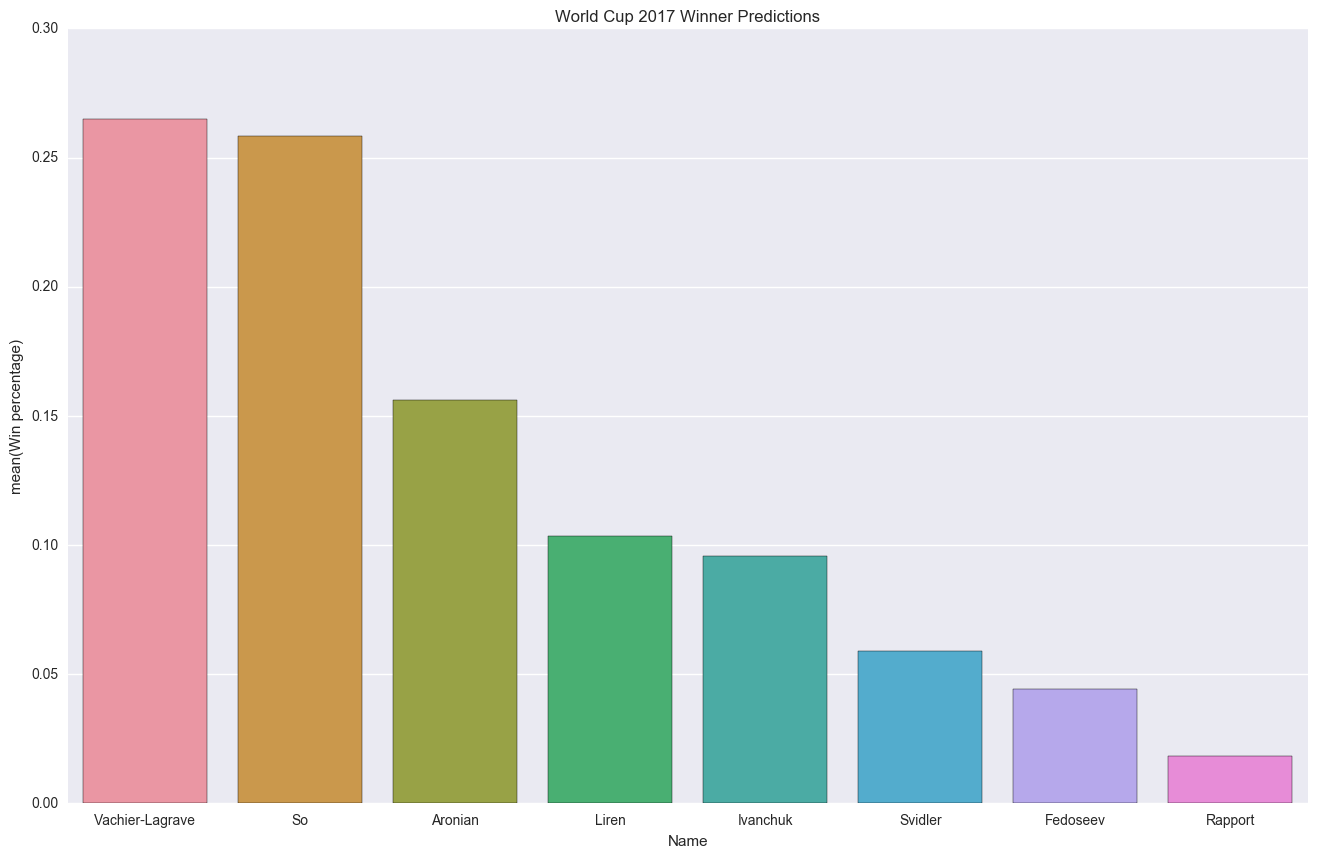

In [25]:
plot_winner_predictions(simulated_players)

This sets the current round scores of the players:

In [35]:
playerdict["Levon Aronian"].current_score = 1
playerdict["Vladimir Fedoseev"].current_score = 0.5
playerdict["Vassily Ivanchuk"].current_score = 0
playerdict["Richard Rapport"].current_score = 0.5
playerdict["Wesley So"].current_score = 0.5
playerdict["Peter Svidler"].current_score = 0.5
playerdict["Maxime Vachier-Lagrave"].current_score = 0.5
playerdict["Ding Liren"].current_score = 0.5

In [33]:
N = 10000
W = 10
verbosity = 0
simulated_players = worldcup_simulations(players, 5, N, W, verbosity)
for player in simulated_players:
    print(player, round(player.win_percentage*100, 3), "%")

Maxime Vachier-Lagrave (2804) 28.55 %
Wesley So (2792) 24.65 %
Levon Aronian (2802) 23.58 %
Ding Liren (2771) 10.37 %
Peter Svidler (2756) 5.34 %
Vladimir Fedoseev (2731) 4.23 %
Richard Rapport (2675) 1.88 %
Vassily Ivanchuk (2727) 1.4 %


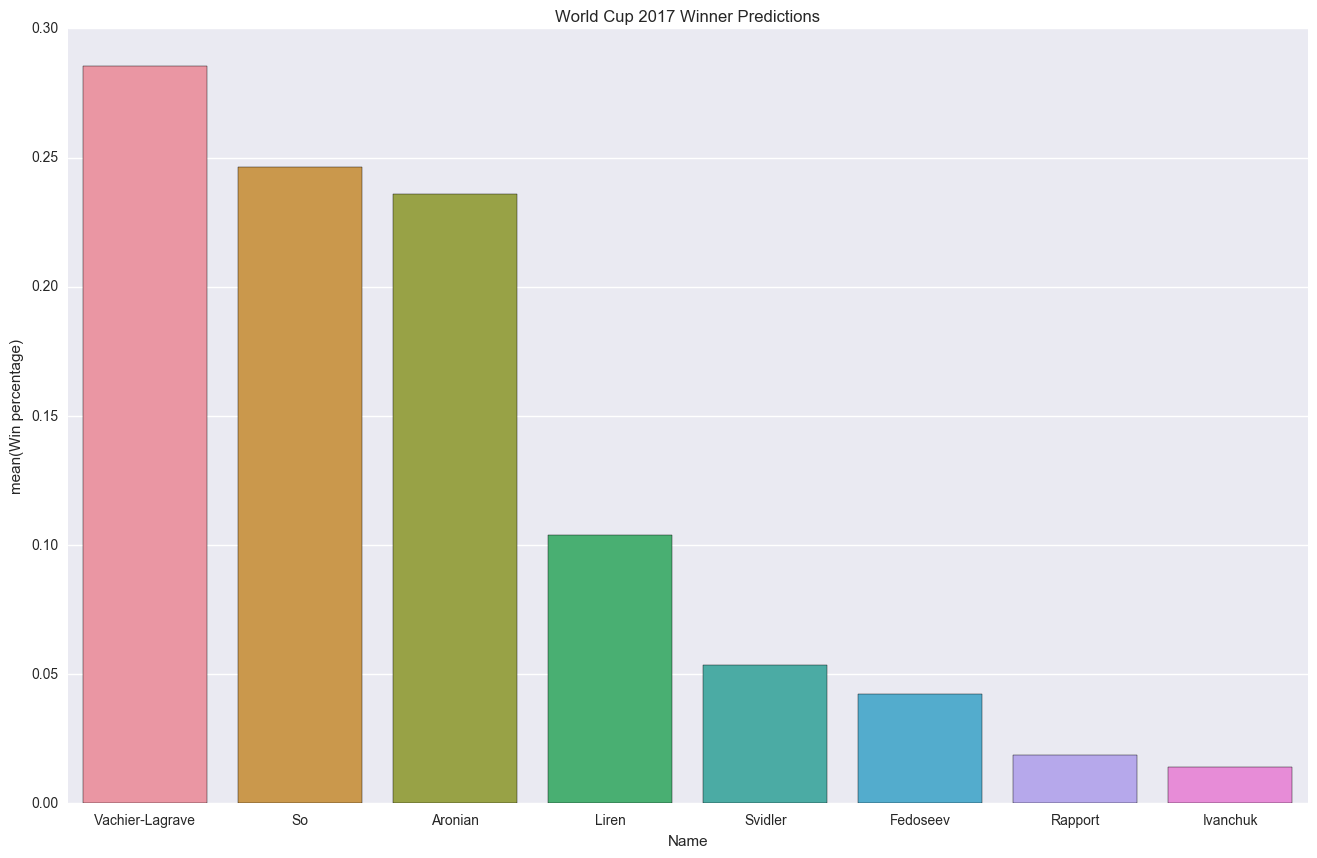

In [34]:
plot_winner_predictions(simulated_players)

In [36]:
worldcup_match_simulations(playerdict["Maxime Vachier-Lagrave"], playerdict["Peter Svidler"], W, 10000, 0)

Maxime Vachier-Lagrave (2804) 0.7314
Peter Svidler (2756) 0.2686


In [37]:
worldcup_match_simulations(playerdict["Vassily Ivanchuk"], playerdict["Levon Aronian"], W, 10000, 0)

Vassily Ivanchuk (2727) 0.0603
Levon Aronian (2802) 0.9397


In [38]:
worldcup_match_simulations(playerdict["Wesley So"], playerdict["Vladimir Fedoseev"], W, 10000, 0)

Wesley So (2792) 0.7171
Vladimir Fedoseev (2731) 0.2829


In [39]:
worldcup_match_simulations(playerdict["Richard Rapport"], playerdict["Ding Liren"], W, 10000, 0)

Richard Rapport (2675) 0.3971
Ding Liren (2771) 0.6029


In [21]:
playerdict["Wesley So"].scores["Classical"]["Baadur Jobava"] = [2,0,2]
playerdict["Wesley So"].scores["RapidBlitz"]["Baadur Jobava"] = [5,0,2]
playerdict["Wesley So"].scores["Classical"]["Maxim Rodshtein"] = [1,0,2]
playerdict["Wesley So"].scores["RapidBlitz"]["Maxim Rodshtein"] = [0,0,0]
playerdict["Wesley So"].scores["Classical"]["Richard Rapport"] = [2,0,0]
playerdict["Wesley So"].scores["RapidBlitz"]["Richard Rapport"] = [0,0,0]
playerdict["Wesley So"].scores["Classical"]["Ding Liren"] = [1,2,11]
playerdict["Wesley So"].scores["RapidBlitz"]["Richard Rapport"] = [2,2,12]
playerdict["Wesley So"].scores["Classical"]["Peter Svidler"] = [0,0,4]
playerdict["Wesley So"].scores["RapidBlitz"]["Peter Svidler"] = [0,0,0]
playerdict["Wesley So"].scores["Classical"]["Bu Xiangzhi"] = [0,0,1]
playerdict["Wesley So"].scores["RapidBlitz"]["Bu Xiangzhi"] = [0,0,0]
playerdict["Wesley So"].scores["Classical"]["Maxime Vachier-Lagrave"] = [1,4,9]
playerdict["Wesley So"].scores["RapidBlitz"]["Maxime Vachier-Lagrave"] = [2,10,15]
playerdict["Wesley So"].scores["Classical"]["Alexander Grischuk"] = [1,0,0]
playerdict["Wesley So"].scores["RapidBlitz"]["Alexander Grischuk"] = [2,0,2]
playerdict["Wesley So"].scores["Classical"]["Vassily Ivanchuk"] = [2,0,4]
playerdict["Wesley So"].scores["RapidBlitz"]["Vassily Ivanchuk"] = [2,0,7]
playerdict["Wesley So"].scores["Classical"]["Levon Aronian"] = [1,3,5]
playerdict["Wesley So"].scores["RapidBlitz"]["Levon Aronian"] = [3,5,11]